In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import cv2
import seaborn as sns

# Habiendo decidido por los datos de LEP, procedemos a analizar los resultados

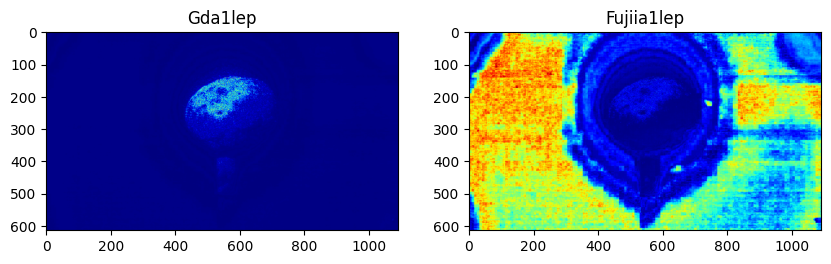

In [2]:
def Openbinaries(filename):
    with open(filename, 'rb' ) as f:
        data = np.fromfile(f, dtype=np.uint8).reshape(614,1092)
    return data

Gda1lep = Openbinaries('LEP/A1LEP_GD.bin')
Fujiia1lep = Openbinaries('LEP/A1LEP_Fujii.bin')

ax, fig = plt.subplots(1,2, figsize=(10,5))
fig[0].imshow(Gda1lep, cmap='jet')
fig[0].set_title('Gda1lep')
fig[1].imshow(Fujiia1lep, cmap='jet')
fig[1].set_title('Fujiia1lep')
plt.show()

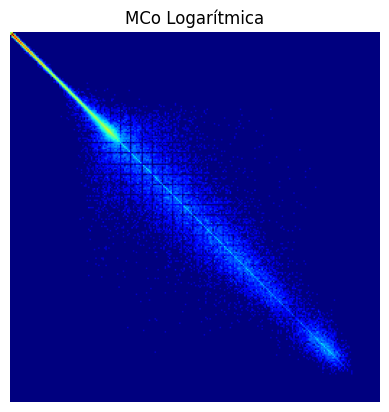

In [3]:
def Openyaml(filename, key = 'MCo', log = False, a = 255):
    # key tambien puede ser 'THSP'
    fs = cv2.FileStorage(filename, cv2.FILE_STORAGE_READ)
    data = fs.getNode(key).mat()
    fs.release()
    if log:
        data = np.log1p(data)*(a / np.log1p(data.max()))
    return data

A1Mco = Openyaml('LEP/A1LEP_MCo.yaml', log = True)

# Graficar
plt.imshow(A1Mco, cmap='jet')
plt.title('MCo Logarítmica')
plt.axis('off')
plt.show()

/tmp/ipykernel_243081/2230954706.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lep_optimos['MI'], lep_NOoptimos['MI']],


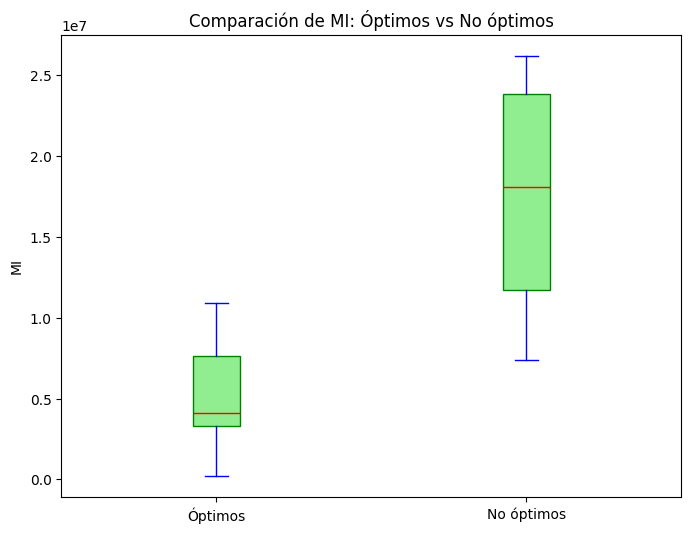

In [4]:
df = pd.read_csv('MIs.csv')
df_lep = pd.concat([df[27:45]],ignore_index=True)
df_lep
lep_optimos = pd.concat([df_lep[0:14]],ignore_index=True)
lep_NOoptimos = pd.concat([df_lep[14:18]],ignore_index=True)
plt.figure(figsize=(8,6))
plt.boxplot([lep_optimos['MI'], lep_NOoptimos['MI']],
            labels=['Óptimos', 'No óptimos'],
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.title("Comparación de MI: Óptimos vs No óptimos")
plt.ylabel("MI")
plt.show()

In [5]:
data_LEP = {}
for i in range(1, 15):
    data_LEP[f"A{i}LEPGdBin"] = Openbinaries(f'LEP/A{i}LEP_GD.bin')
    data_LEP[f"A{i}LEPFujiiBin"] = Openbinaries(f'LEP/A{i}LEP_Fujii.bin')
    data_LEP[f"A{i}LEPMCoyaml"] = Openyaml(f'LEP/A{i}LEP_MCo.yaml')
    data_LEP[f"A{i}LEPTHSPyaml"] = Openyaml(f'LEP/A{i}LEP_THSP.yaml',key='THSP')
data_LEP["ARLEPGdBin"] = Openbinaries('LEP/ARLEP_GD.bin')
data_LEP["ARLEPFujiiBin"] = Openbinaries('LEP/ARLEP_Fujii.bin')
data_LEP["ARLEPMCoyaml"] = Openyaml('LEP/ARLEP_MCo.yaml')
data_LEP["ARLEPTHSPyaml"] = Openyaml('LEP/ARLEP_THSP.yaml',key='THSP')
data_LEP["avglepGdBin"] = Openbinaries('LEP/avglep_GD.bin')
data_LEP["avglepFujiiBin"] = Openbinaries('LEP/avglep_Fujii.bin')
data_LEP["avglepMCoyaml"] = Openyaml('LEP/avglep_MCo.yaml')
data_LEP["avglepTHSPyaml"] = Openyaml('LEP/avglep_THSP.yaml',key='THSP')
data_LEP["avlepGdBin"] = Openbinaries('LEP/avlep_GD.bin')
data_LEP["avlepFujiiBin"] = Openbinaries('LEP/avlep_Fujii.bin')
data_LEP["avlepMCoyaml"] = Openyaml('LEP/avlep_MCo.yaml')
data_LEP["avlepTHSPyaml"] = Openyaml('LEP/avlep_THSP.yaml',key='THSP')
data_LEP["AVMLEPGdBin"] = Openbinaries('LEP/AVMLEP_GD.bin')
data_LEP["AVMLEPFujiiBin"] = Openbinaries('LEP/AVMLEP_Fujii.bin')
data_LEP["AVMLEPMCoyaml"] = Openyaml('LEP/AVMLEP_MCo.yaml')
data_LEP["AVMLEPTHSPyaml"] = Openyaml('LEP/AVMLEP_THSP.yaml',key='THSP')


In [6]:
# Añadir nuevas columnas al DataFrame
df_lep['GdBin'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}GdBin"))
df_lep['FujiiBin'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}FujiiBin"))
df_lep['MCoyaml'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}MCoyaml"))
df_lep['THSPyaml'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}THSPyaml"))


In [ ]:
df_lep['GdMean'] = df_lep['GdBin'].apply(lambda x: np.mean(x))
df_lep['GdStd'] = df_lep['GdBin'].apply(lambda x: np.std(x))
df_lep['FujiiMean'] = df_lep['FujiiBin'].apply(lambda x: np.mean(x))
df_lep['FujiiStd'] = df_lep['FujiiBin'].apply(lambda x: np.std(x))
df_lep['clase'] = ['óptimo'] * 14 + ['no óptimo'] * 4

In [29]:
df_lep.sample(3)

,nombre,MI,GdBin,FujiiBin,MCoyaml,THSPyaml,GdMean,GdStd,FujiiMean,FujiiStd,clase,GdM/S,FujiiM/S,GdS/M,FujiiS/M
4,A5LEP,3291560.0,"[[2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,...","[[18, 18, 15, 15, 18, 18, 18, 18, 24, 24, 22, ...","[[3595, 1870, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...",3.137260,9.872136,110.197153,70.468425,óptimo,0.317789,1.563781,3.146739,0.639476
11,A12LEP,7706870.0,"[[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,...","[[49, 49, 55, 55, 54, 54, 53, 52, 62, 61, 68, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,...",4.630465,15.600474,80.387944,61.170128,óptimo,0.296816,1.314170,3.369095,0.760937
17,AVMLEP,7365780.0,"[[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,...","[[26, 26, 28, 28, 32, 32, 36, 36, 57, 59, 46, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2,...",6.173917,22.714903,97.349532,51.087669,no óptimo,0.271800,1.905539,3.679172,0.524786


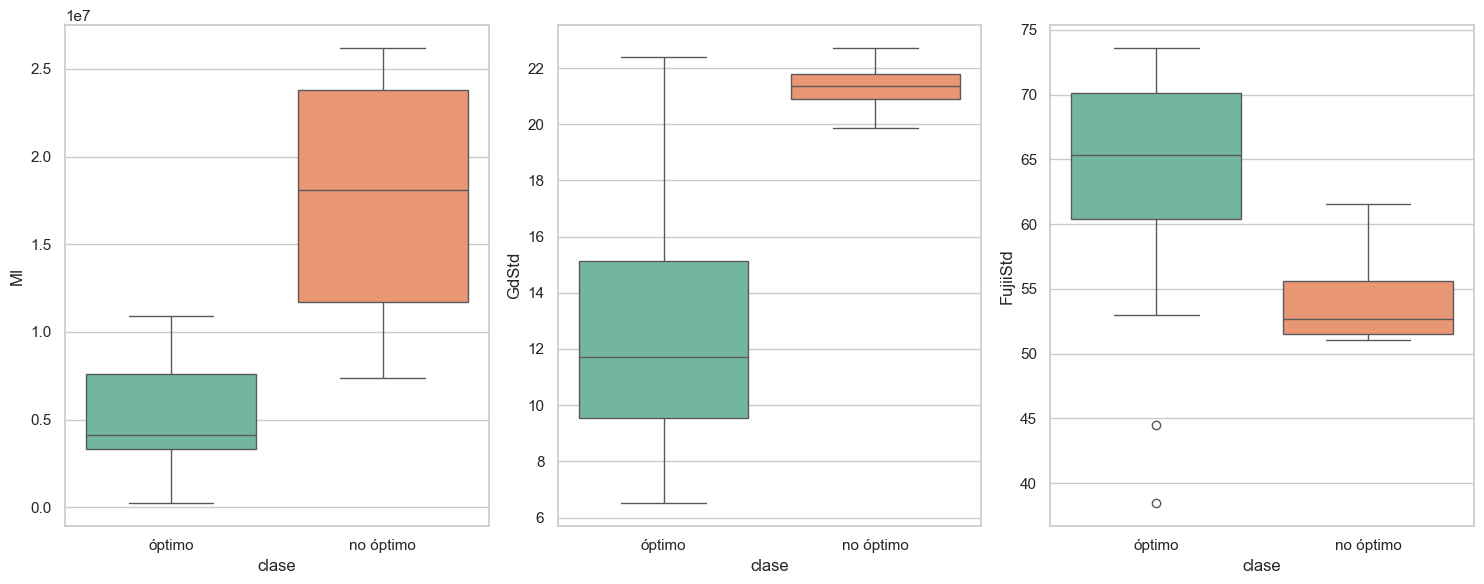

In [ ]:
# Configuramos el estilo de Seaborn
sns.set_theme(style="whitegrid", palette="Set2")

columns = ['MI', 'GdStd', 'FujiiStd']

n_cols = 3
n_rows = int(np.ceil(len(columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 6))
axes = axes.flatten()



for i, col in enumerate(columns):
    sns.boxplot(x='clase', y=col, data=df_lep, ax=axes[i],
                hue='clase', dodge=False, palette="Set2")
    # Remove the legend since hue isGdM/S redundant with x
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()
        axes[i].set_title(f"{col} por clase", fontsize=14)
        axes[i].set_xlabel("")
        axes[i].set_ylabel(col, fontsize=12)
    
# Eliminar ejes sobrantes si existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

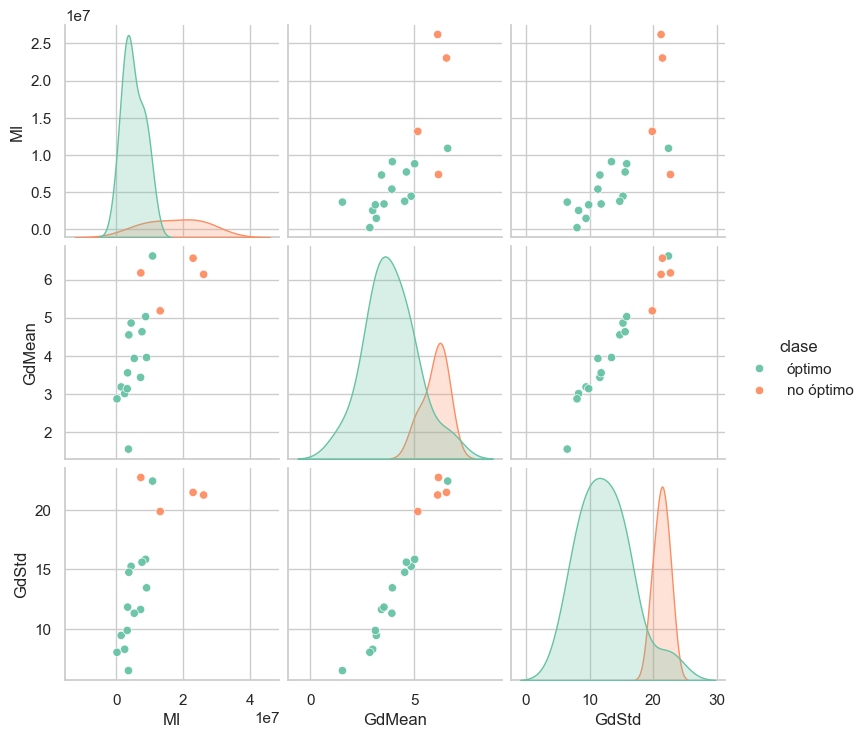

In [32]:
cols = ['MI', 'GdMean', 'GdStd']

grid = sns.pairplot(df_lep[cols + ['clase']], hue='clase', diag_kind='kde', plot_kws={'alpha':0.95})
plt.show()

In [62]:
from scipy.stats import mannwhitneyu
variables = ['MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd']

# Separar los grupos
optimo = df_lep[df_lep['clase'] == 'óptimo']
no_optimo = df_lep[df_lep['clase'] == 'no óptimo']

for var in variables:
    optimo_data = optimo[var]
    no_optimo_data = no_optimo[var]
    stat, p = mannwhitneyu(optimo_data, no_optimo_data, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney para {var}:")
    print(f"Estadístico U = {stat:.2g}, p-valor = {p:.2g}")
    if p < 0.05:
        print(f"Resultado: Hay una diferencia significativa (p < 0.05).")
    else:
        print(f"Resultado: No hay evidencia de diferencia significativa (p >= 0.05).")
    print()

Prueba U de Mann-Whitney para MI:
Estadístico U = 4, p-valor = 0.0078
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para GdMean:
Estadístico U = 4, p-valor = 0.0078
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para GdStd:
Estadístico U = 3, p-valor = 0.0046
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para FujiiMean:
Estadístico U = 35, p-valor = 0.51
Resultado: No hay evidencia de diferencia significativa (p >= 0.05).

Prueba U de Mann-Whitney para FujiiStd:
Estadístico U = 44, p-valor = 0.1
Resultado: No hay evidencia de diferencia significativa (p >= 0.05).



In [63]:
from scipy.stats import shapiro, levene

# Lista de variables a analizar
variables = ['MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd']

# Separar los grupos
optimo = df_lep[df_lep['clase'] == 'óptimo']
no_optimo = df_lep[df_lep['clase'] == 'no óptimo']

# Iterar sobre cada variable
for var in variables:
    print(f"--- Análisis para {var} ---")
    
    # Prueba de normalidad para el grupo óptimo
    stat_opt, p_opt = shapiro(optimo[var])
    # Prueba de normalidad para el grupo no óptimo
    stat_no_opt, p_no_opt = shapiro(no_optimo[var])
    print(f"Normalidad óptimo: p={p_opt:.2g}, no óptimo: p={p_no_opt:.2g}")
    
    # Prueba de homogeneidad de varianzas
    stat, p = levene(optimo[var], no_optimo[var])
    print(f"Homogeneidad de varianzas: p={p:.2g}")
    
    # Interpretación simple
    if p_opt > 0.05 and p_no_opt > 0.05:
        print("Resultado: Ambos grupos son normales (p >= 0.05).")
    else:
        print("Resultado: Al menos un grupo no es normal (p < 0.05).")
    
    if p > 0.05:
        print("Resultado: Las varianzas son homogéneas (p >= 0.05).")
    else:
        print("Resultado: Las varianzas no son homogéneas (p < 0.05).")
    
    print()  # Espacio para separar los resultados de cada variable

--- Análisis para MI ---
Normalidad óptimo: p=0.64, no óptimo: p=0.62
Homogeneidad de varianzas: p=0.0019
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas no son homogéneas (p < 0.05).

--- Análisis para GdMean ---
Normalidad óptimo: p=0.78, no óptimo: p=0.35
Homogeneidad de varianzas: p=0.19
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas son homogéneas (p >= 0.05).

--- Análisis para GdStd ---
Normalidad óptimo: p=0.44, no óptimo: p=0.86
Homogeneidad de varianzas: p=0.11
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas son homogéneas (p >= 0.05).

--- Análisis para FujiiMean ---
Normalidad óptimo: p=0.64, no óptimo: p=0.25
Homogeneidad de varianzas: p=0.16
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas son homogéneas (p >= 0.05).

--- Análisis para FujiiStd ---
Normalidad óptimo: p=0.041, no óptimo: p=0.12
Homogeneidad de varianzas: p=0.25
Resultado: Al menos un grupo no es norm

Prueba t de Student para GdMean:
Estadístico t = -3.3, p-valor = 0.0042
Resultado: Hay una diferencia significativa en las medias (p < 0.05).


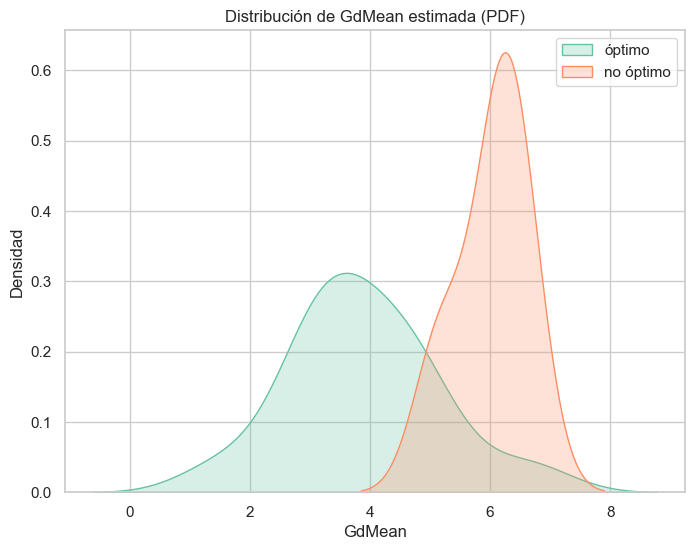

In [65]:
from scipy.stats import ttest_ind

# Separar los grupos para GdMean
optimo = df_lep[df_lep['clase'] == 'óptimo']['GdMean']
no_optimo = df_lep[df_lep['clase'] == 'no óptimo']['GdMean']

# Realizar la prueba t (asuGdMeanendo varianzas iguales)
stat, p = ttest_ind(optimo, no_optimo, equal_var=True)
print("Prueba t de Student para GdMean:")
print(f"Estadístico t = {stat:.2g}, p-valor = {p:.2g}")

if p < 0.05:
    print("Resultado: Hay una diferencia significativa en las medias (p < 0.05).")
else:
    print("Resultado: No hay evidencia de diferencia significativa (p >= 0.05).")

# Graficar la distribución de GdMean en ambos grupos usando estimación de densidad (KDE)
plt.figure(figsize=(8,6))
sns.kdeplot(optimo, fill = True , label='óptimo')
sns.kdeplot(no_optimo, fill = True , label='no óptimo')
plt.title("Distribución de GdMean estimada (PDF)")
plt.xlabel("GdMean")
plt.ylabel("Densidad")
plt.legend()
plt.show()

/tmp/ipykernel_15063/3112069708.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(list(datasets.values()), labels=list(datasets.keys()))


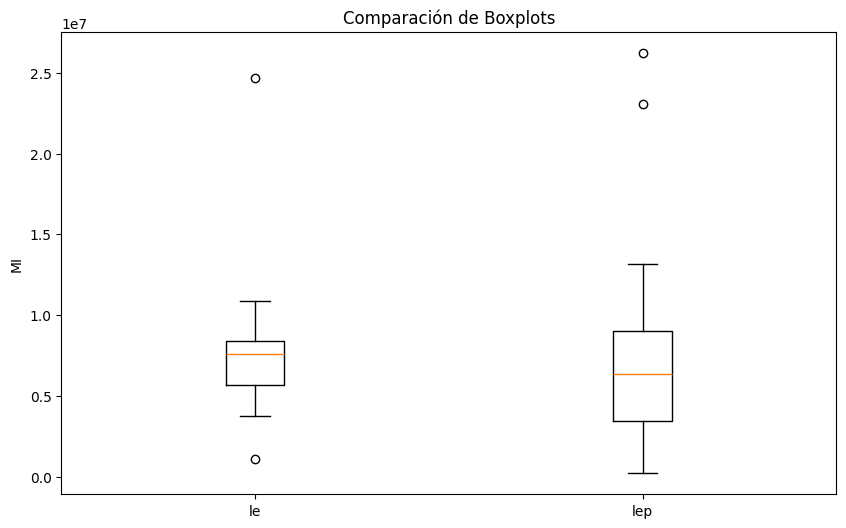

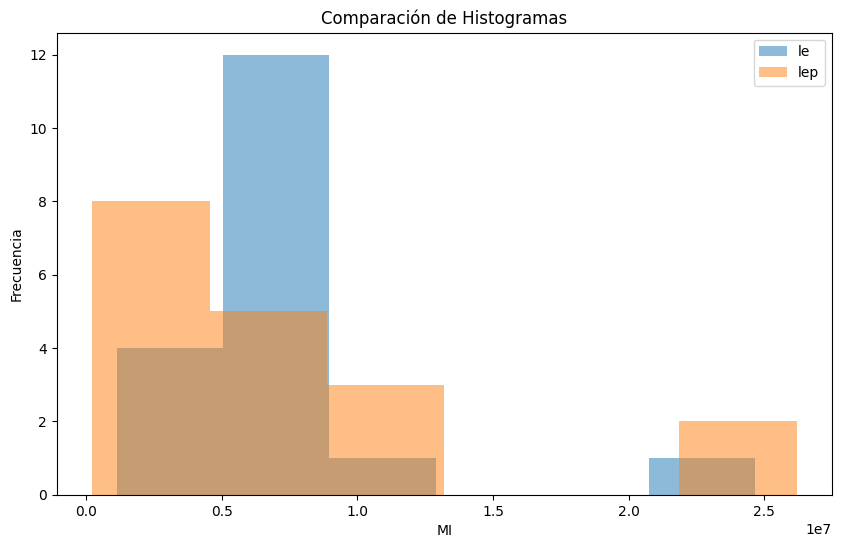

In [ ]:
# Comparación de boxplots y histogramas de las distribuciones de MI

# le = pd.concat([df[0:18]],ignore_index=True)
# lep = pd.concat([df[27:45]],ignore_index=True)
# verdes = pd.concat([df[15:18], df[26:27], df[42:45], df[53:54]], ignore_index=True)
# rojos = pd.concat([df[14:15], df[25:26], df[41:42], df[52:53]] , ignore_index=True)
# abajo = pd.concat([df[18:27], df[45:54]], ignore_index=True)
# noabajo = pd.concat([df[0:18], df[27:45]], ignore_index=True)

# Extraer la serie 'MI' de cada DataFrame y organizarlas en un diccionario
datasets = {
    #'Todos' : df['MI'],
    'le': le['MI'],
    'lep': lep['MI'],
    #'verdes': verdes['MI'],
    #'rojos': rojos['MI'],
    #'abajo': abajo['MI'],
    #'noabajo': noabajo['MI']
}

# Boxplots: dibujar todos los boxplots en una única gráfica para comparar
plt.figure(figsize=(10, 6))
plt.boxplot(list(datasets.values()), labels=list(datasets.keys()))
plt.title("Comparación de Boxplots")
plt.ylabel("MI")
plt.show()

# Histogramas: dibujar los histogramas superpuestos de cada grupo
plt.figure(figsize=(10, 6))
for name, data in datasets.items():
    plt.hist(data, bins='sturges', alpha=0.5, label=name)
plt.title("Comparación de Histogramas")
plt.xlabel("MI")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Ajuste Lognormal:
  shape = 0.69, loc = -1.4e+06, scale = 7.4e+06
  KS statistic = 0.097, p-value = 0.99



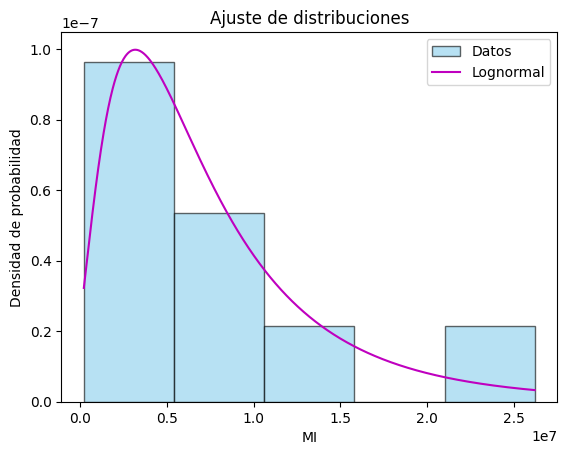

In [99]:
# Supongamos que tus datos están en un array llamado 'data'
data = lep['MI'].values

# # Ajustar la distribución normal
# mu, std = stats.norm.fit(data)
# ks_norm = stats.kstest(data, 'norm', args=(mu, std))
# print("Ajuste Normal:")
# print(f"  mu = {mu:.2g}, std = {std:.2g}")
# print(f"  Variance = {(std**2):.2g}")
# print(f"  KS statistic = {ks_norm.statistic:.2g}, p-value = {ks_norm.pvalue:.2g}\n")
# Ajustar la distribución Lognormal
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(data)
ks_lognorm = stats.kstest(data, 'lognorm', args=(shape_ln, loc_ln, scale_ln))
print("Ajuste Lognormal:")
print(f"  shape = {shape_ln:.2g}, loc = {loc_ln:.2g}, scale = {scale_ln:.2g}")
print(f"  KS statistic = {ks_lognorm.statistic:.2g}, p-value = {ks_lognorm.pvalue:.2g}\n")

# Crear un rango de valores para graficar las densidades
x = np.linspace(np.min(data), np.max(data), 1000)

# Calcular las densidades de probabilidad para cada ajuste
#pdf_norm   = stats.norm.pdf(x, mu, std)
pdf_lognorm= stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln)

# Graficar el histograma y las distribuciones ajustadas

plt.hist(data, bins = 5, density=True, alpha=0.6,
         color='skyblue', edgecolor='black', label="Datos")
#plt.plot(x, pdf_norm,   'r-', label='Normal')
plt.plot(x, pdf_lognorm,'m-', label='Lognormal')
plt.xlabel('MI')
plt.ylabel('Densidad de probabilidad')
plt.title('Ajuste de distribuciones')
plt.legend()
plt.show()
